h shape: (400, 400)
delta shape: (200, 200)
Expected size for n=200: (200, 200)
Plot saved as eigen_plot_lambda_1.0_-1.2_v_400.png


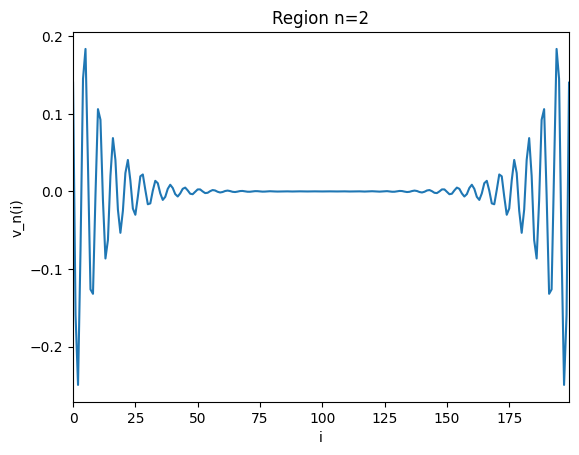

In [21]:
import sys
import os
import numpy as np

# Add the path to your custom modules
sys.path.insert(0, os.path.abspath("../src"))

# Now import your custom modules
from tfim_model_core import build_tfim_hamiltonian
from majorana_transform import build_delta
from utils import plot_eigenvector

# Parameters
n = 200
lambda_1 = 1.0
lambda_2 = -1.2

# Build components
h = build_tfim_hamiltonian(n, lambda_1, lambda_2)
delta = build_delta(n, lambda_1, lambda_2)

# Debug: Check the shapes
print(f"h shape: {h.shape}")
print(f"delta shape: {delta.shape}")
print(f"Expected size for n={n}: ({n}, {n})")

# Check if h is already the full 2n x 2n matrix
if h.shape[0] == 2 * n:
    # If h is already the full Hamiltonian, use it directly
    H = h
else:
    # Construct the full Hamiltonian matrix
    H = np.zeros((2 * n, 2 * n), dtype=float)
    H[:n, :n] = h
    H[:n, n:] = delta
    H[n:, :n] = -delta
    H[n:, n:] = -h

# Compute eigenvalues and eigenvectors
eigval, eigvec = np.linalg.eig(H)

# Plot the eigenvector
plot_eigenvector(eigvec, lambda_1, lambda_2, n=n, index=2 * n - 1)